# Power Production - a Machine Learning project playground

>Author: **Andrzej Kocielski**  

This is a playground notebook for testing only. The actual project notebook is [Powerproduction_ML.ipynb](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git/Powerproduction_ML.ipynb).

For more information see [README.md](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git/README.MD).


___

## Loose notes and ideas

### Ideas

1. There is a number of observation in the data set where produced power output is zero, regardless of the wind speed. These data points should be removed from analysis.
2. ...

### ML Techniques

- Unsupervised
    - Clustering
    - Dimensional reduction
- Supervised
    - Regression
    - Classification
- Reinforced Learning

![image](https://miro.medium.com/max/700/1*AqNYz4M_GgfUN2ROb798yg.jpeg)

Image source: [Medium.com](https://miro.medium.com/max/700/1*AqNYz4M_GgfUN2ROb798yg.jpeg)

### ML algorithms

- Linear regression
- Logarithmic regression
- Decision Tree
- Decision Forrest
- Random Forrest
- t-Test
- k nearest neighbour (kNN)
- k-means
- Anova (analysis of variance)
- Support Vector Machine (SVM)
- Principal Component Analysis (PCA)
- Naive Bayes
- Dimensionality Reduction Algorithms

![image](https://docs.microsoft.com/en-us/azure/machine-learning/media/algorithm-cheat-sheet/machine-learning-algorithm-cheat-sheet.svg)
Image source: [Microsoft.com](https://docs.microsoft.com/en-us/azure/machine-learning/media/algorithm-cheat-sheet/machine-learning-algorithm-cheat-sheet.svg)

![image](https://miro.medium.com/max/1920/1*Lejtm0oGlOC5U0-J0JmGhg.png)
Image source: [Medium.com](https://miro.medium.com/max/1920/1*Lejtm0oGlOC5U0-J0JmGhg.png)

### To Do

1. Exploratory data analysis
2. Data cleaning
3. Data modeling (add / combine / infer additional data)
4. Select ML techniques to be used (explain why)
5. Do ML - analyse predictions accuracy etc. for various boundary conditions and parameters
6. Draw a conclusion

___

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylel

## Data set

In [2]:
# Data set is loaded from the file `powerproduction.txt`.
df = pd.read_csv(r"powerproduction.txt")

In [3]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


## Import Seaborn

In [4]:
import seaborn as sns

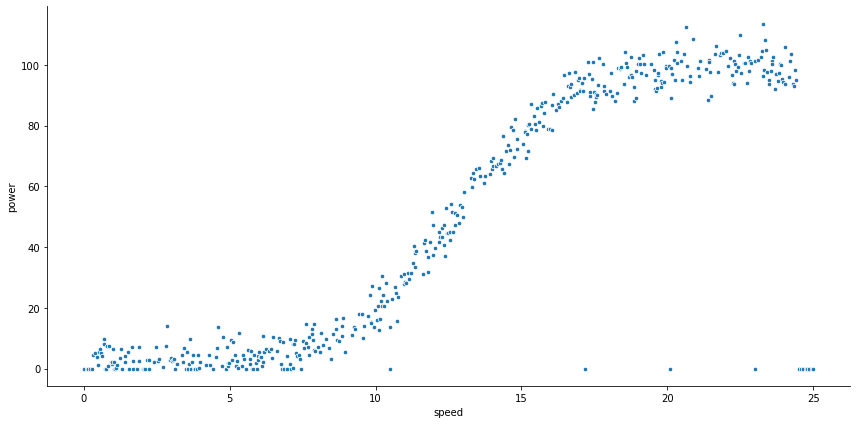

In [5]:
sns.relplot(data=df, x="speed", y="power", s=20, palette="pastel", height=6, aspect=2)

In [6]:

df_sd = pd.DataFrame()
print(df_sd)
for index, row in df.iterrows():
    speed_difference = df.iloc[index]['speed'] - df.iloc[index-1]['speed']
    # print(speed_difference)
    df_sd = df_sd.append({'speed diff': speed_difference}, ignore_index=True)

df_sd = df_sd.drop(index=[0], axis=0)
print(df_sd)  

Empty DataFrame
Columns: []
Index: []
     speed diff
1         0.125
2         0.025
3         0.075
4         0.050
5         0.050
..          ...
495       0.025
496       0.075
497       0.025
498       0.075
499       0.050

[499 rows x 1 columns]


In [7]:
df_sd.describe()

,speed diff
count,499.000000
mean,0.050100
std,0.036355
min,0.025000
25%,0.025000
50%,0.026000
75%,0.051000
max,0.250000


<AxesSubplot:>

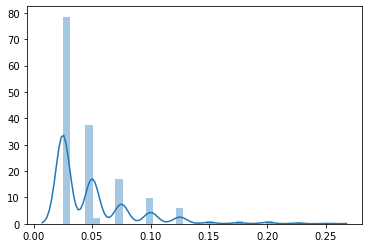

In [8]:
sns.distplot(df_sd)

<AxesSubplot:xlabel='speed'>

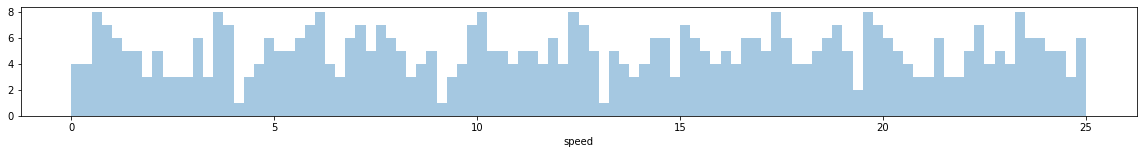

In [35]:
# what wind speeds dominate - it appears to be more or less uniformely distributed
plt.figure(figsize=(20,2))
sns.distplot(df.speed, bins=100, kde=False)

<AxesSubplot:xlabel='power'>

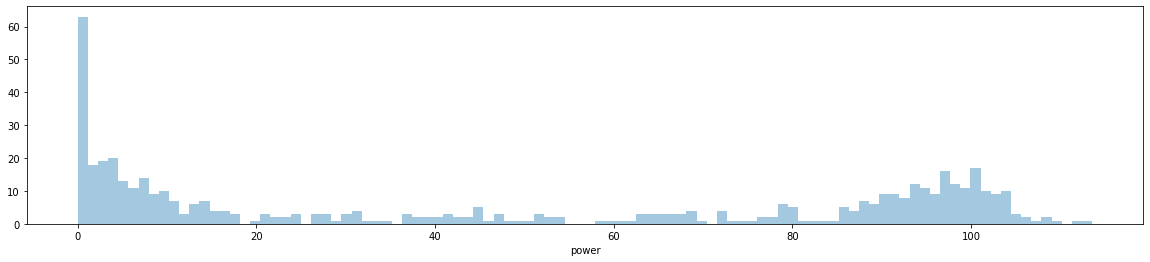

In [32]:
plt.figure(figsize=(20,4))
sns.distplot(df.power, bins=100, kde=False)

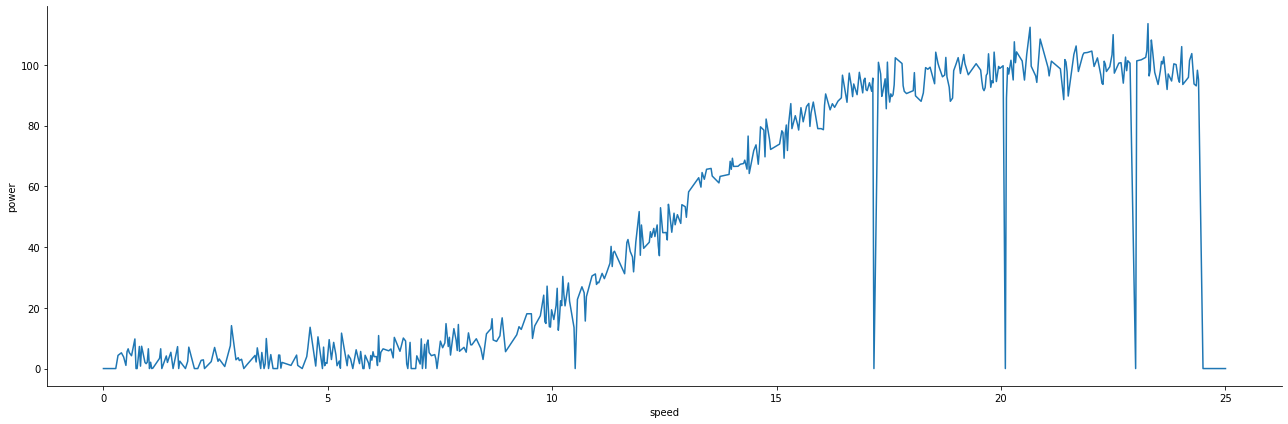

In [11]:
sns.relplot(
    data=df,
    x="speed", y="power",
    kind="line", size_order=["T1", "T2"], palette="pastel",
    height=6, aspect=3, facet_kws=dict(sharex=False)
)

<AxesSubplot:xlabel='speed', ylabel='power'>

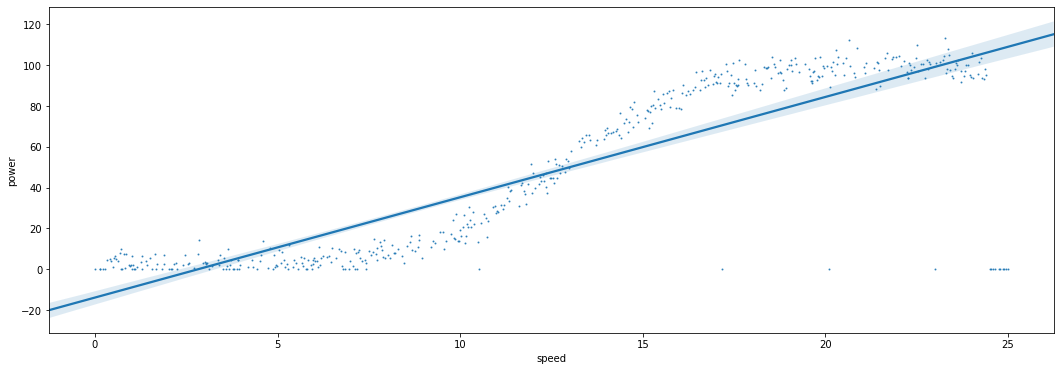

In [12]:
# Linear regression is an underfitting approximation
plt.figure(figsize=(18,6))
sns.regplot(data=df, x="speed", y="power", scatter_kws={'s':1})

In [14]:
# clean the dataset by removing all observations where the power output is zero

df_clean = df[df['power'] !=0]
df_clean

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


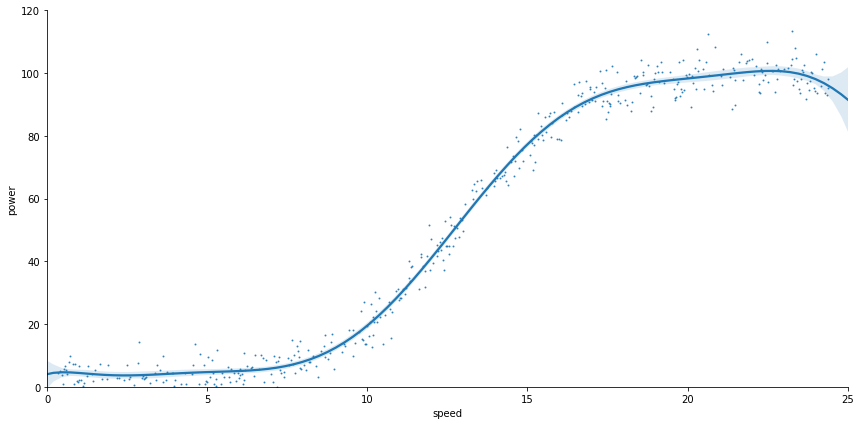

In [15]:
# Polynomial regression for cleaned dataset

a_plot = sns.lmplot(data=df_clean, x="speed", y="power", order=9, height=6, aspect=2, scatter_kws={'s':1})

a_plot.set(xlim=(0, 25))
a_plot.set(ylim=(0, 120))

plt.show()